# Порівняння класифікаторів LR, LDA, KNN, CART, NB та SVM

## Автоматизація процесу машинного навчання використовуючи конвеєри (pipelines)

У проекті машинного навчання є стандартні робочі процеси, які можна автоматизувати. В Python scikit-learn, конвеєри (pipelines) допомагають чітко визначити та автоматизувати ці робочі процеси.
* pipelines допомагають проблему неповноти даних;
* pipelines працюють, дозволяючи лінійній послідовності перетворень даних зв'язуватись в процес моделювання.

#### Підготовка даних та моделювання конвеєру

In [33]:
%matplotlib inline
import matplotlib.pyplot as plt

# Створення pipeline, що стандартизує дані та створює модель
# завантаження бібліотек для обробки даних
import pandas as pd # обробка даних, CSV file I/O (e.g. pd.read_csv)
import numpy as np
from scipy.stats import norm

from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
# візуалізація
import seaborn as sns 
plt.style.use('fivethirtyeight')
sns.set_style("white")

plt.rcParams['figure.figsize'] = (8,4) 
plt.rcParams['axes.titlesize'] = 'large'

### Оцінка алгоритмів
Потрібно створити деякі моделі даних та оцінити їх точність за невидимими даними. Кроки:
1. Відокремити набір даних для перевірки;
2. Налаштувати тестовий набір для проведення 10-кратної крос-валідації;
3. Побудувати 5 різних моделей;
4. Обрати найкращу модель.

#### 1.0 Набір даних валідації

In [4]:
#завантаження даних
data = pd.read_csv('data/clean-data.csv', index_col=False)
data.drop('Unnamed: 0',axis=1, inplace=True)

# розділення набору даних валідації
array = data.values
X = array[:,1:31]
y = array[:,0]

# розділення тестових та навчальних даних
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)

# перетворення класових міток з рядкових у цілочисельний тип
le = LabelEncoder()
y = le.fit_transform(y)

#### 2.0 Оцінка алгоритмів

In [21]:
import warnings
warnings.filterwarnings('ignore')
# алгоритми точкової перевірки
models = []
models.append(( 'LR' , LogisticRegression()))
models.append(( 'LDA' , LinearDiscriminantAnalysis()))
models.append(( 'KNN' , KNeighborsClassifier()))
models.append(( 'CART' , DecisionTreeClassifier()))
models.append(( 'NB' , GaussianNB()))
models.append(( 'SVM' , SVC()))

# Варіанти тестування та метрика оцінювання
num_folds = 10
num_instances = len(X_train)
seed = 7 
scoring =  'accuracy'

# Варіанти тестування та метрика оцінювання
num_folds = 10
num_instances = len(X_train)
seed = 7 
scoring =  'accuracy'
results = []
names = []
kfold = KFold(n_splits=num_folds, shuffle=True, random_state=seed)
for name, model in models:
 cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
 results.append(cv_results)
 names.append(name)
 msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
 print(msg)
print('-> 10-Fold cross-validation accurcay score for the training data for six classifiers')

LR: 0.944808 (0.026834)
LDA: 0.954744 (0.018784)
KNN: 0.937179 (0.028218)
CART: 0.924679 (0.031733)
NB: 0.937115 (0.040822)
SVM: 0.901987 (0.047020)
-> 10-Fold cross-validation accurcay score for the training data for six classifiers


#### Результати спостережень
> Як LR, так і LDA можуть бути вартими подальшого вивчення. Але слід враховувати, що це просто середні значення точності. Ефективніше дивитися на розподіл значень точності, обчислених у складі перехресної перевірки. Це можна виконати графічно, використовуючи графіки box та whisker.

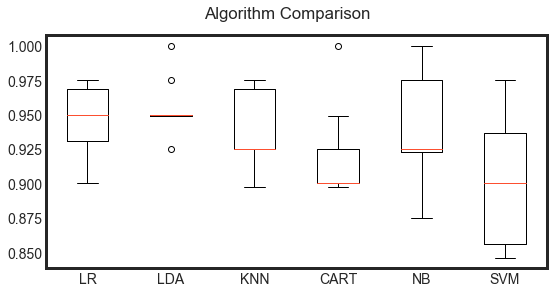

In [17]:
# порівняння алгоритмів
fig = plt.figure()
fig.suptitle( 'Algorithm Comparison' )
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

#### Результати спостережень
> Усі класифікатори, окрім SVM, показують аналогічний жорсткий розподіл, що є обнадійливим, бо пропонують низьку дисперсію. SVM показує погані результати.
> Розподіл ознак може вплинути на точність таких алгоритмів, як SVM.

### Оцінка алгоритмів: стандартизація даних

In [22]:
# стандартизація набору даних
pipelines = []
pipelines.append(( 'ScaledLR' , Pipeline([( 'Scaler' , StandardScaler()),( 'LR' ,
    LogisticRegression())])))
pipelines.append(( 'ScaledLDA' , Pipeline([( 'Scaler' , StandardScaler()),( 'LDA' ,
    LinearDiscriminantAnalysis())])))
pipelines.append(( 'ScaledKNN' , Pipeline([( 'Scaler' , StandardScaler()),( 'KNN' ,
    KNeighborsClassifier())])))
pipelines.append(( 'ScaledCART' , Pipeline([( 'Scaler' , StandardScaler()),( 'CART' ,
    DecisionTreeClassifier())])))
pipelines.append(( 'ScaledNB' , Pipeline([( 'Scaler' , StandardScaler()),( 'NB' ,
    GaussianNB())])))
pipelines.append(( 'ScaledSVM' , Pipeline([( 'Scaler' , StandardScaler()),( 'SVM' , SVC())])))

results = []
names = []
kfold = KFold(n_splits=num_folds, shuffle=True, random_state=seed)
for name, model in pipelines:
  cv_results = cross_val_score(model, X_train, y_train, cv=kfold,
      scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)

ScaledLR: 0.974936 (0.015813)
ScaledLDA: 0.954744 (0.018784)
ScaledKNN: 0.957372 (0.033665)
ScaledCART: 0.929744 (0.038275)
ScaledNB: 0.937115 (0.039261)
ScaledSVM: 0.967436 (0.027483)


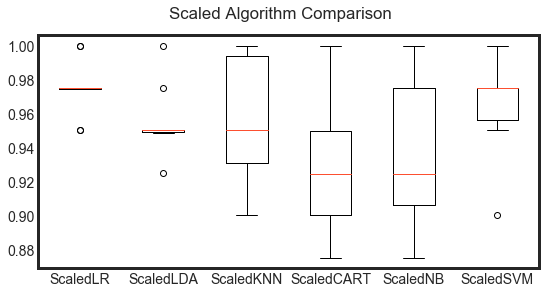

In [23]:
# порівняння алгоритмів
fig = plt.figure()
fig.suptitle( 'Scaled Algorithm Comparison' )
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

#### Результати спостережень
> Стандартизація даних підвищила результативність SVM настільки, що він став найточнішим серед усіх алгоритмів.

Отримані результати пропонують розгянути алгоритми SVM та LDA та LR. Дуже ймовірно, що додаткова конфігурація може підвищити точність цих моделей.

### Налаштування алгоритмів

#### Налаштування гіперпараметрів SVM

In [28]:
# робимо SVC Pipeline
pipe_svc = Pipeline([('scl', StandardScaler()),
                     ('pca', PCA(n_components=2)),
                     ('clf', SVC(probability=True, verbose=False))])

# підгін параметрів Pipeline до навчальних даних
pipe_svc.fit(X_train, y_train)

print('--> Fitted Pipeline to training Data')

scores = cross_val_score(estimator=pipe_svc, X=X_train, y=y_train, cv=10, n_jobs=1, verbose=0)
print('--> Model Training Accuracy: %.3f +/- %.3f' %(np.mean(scores), np.std(scores)))

# налаштування гіпер-параметрів
param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]
param_grid = [{'clf__C': param_range,'clf__kernel': ['linear']},
              {'clf__C': param_range,'clf__gamma': param_range,
               'clf__kernel': ['rbf']}]
gs_svc = GridSearchCV(estimator=pipe_svc,
                  param_grid=param_grid,
                  scoring='accuracy',
                  cv=10,
                  n_jobs=1)
gs_svc = gs_svc.fit(X_train, y_train)
print('--> Tuned Parameters Best Score: ',gs_svc.best_score_)
print('--> Best Parameters: \n',gs_svc.best_params_)

--> Fitted Pipeline to training Data
--> Model Training Accuracy: 0.940 +/- 0.034
--> Tuned Parameters Best Score:  0.9446794871794871
--> Best Parameters: 
 {'clf__C': 1.0, 'clf__kernel': 'linear'}


#### Допрацювання моделі

In [30]:
# використання найкращих параметрів
clf_svc = gs_svc.best_estimator_

#Get Final Scores
clf_svc.fit(X_train, y_train)
scores = cross_val_score(estimator=clf_svc,
                         X=X_train,
                         y=y_train,
                         cv=10,
                         n_jobs=1)
print('--> Final Model Training Accuracy: %.3f +/- %.3f' %(np.mean(scores), np.std(scores)))

print('--> Final Accuracy on Test set: %.5f' % clf_svc.score(X_test,y_test))

--> Final Model Training Accuracy: 0.945 +/- 0.041
--> Final Accuracy on Test set: 0.97076


In [31]:
clf_svc.fit(X_train, y_train)
y_pred = clf_svc.predict(X_test)

print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.9707602339181286
[[114   2]
 [  3  52]]
              precision    recall  f1-score   support

           B       0.97      0.98      0.98       116
           M       0.96      0.95      0.95        55

    accuracy                           0.97       171
   macro avg       0.97      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171



### Висновок

Опрацьовано класифікаційне прогностичне моделювання використовуючи машинне навчання. Зокрема, розглянуті та реалізовані наступні кроки:
1. Визначення проблеми;
2. Завантаження вхідного набору даних;
3. Аналіз даних та моделей;
4. Налаштування алгоритму (К=19 для KNN мав гарні результати; SVM з RBF ядром та C=100 мав найкращі);
5. Допрацювання моделі (використання усіх навчальних даних та перевірка на тестовому наборі даних).